In [1]:
from xgboost import XGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_path = r"C:\Users\Akshay zAck\Downloads\PS_Homework_data_set.csv"
df = pd.read_csv(df_path)
df.head()

,Unnamed: 0,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue
0,0,485,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-07-14,3855,138,NaN
1,1,598,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-08-02,3836,138,NaN
2,2,673,1,2017-02-01 00:00:00.000000,2017-04-28 15:36:30.000000,NaN,2006-08-17,3821,86,NaN
3,3,813,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-09-12,3795,138,NaN
4,4,1132,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-02,3744,138,NaN


In [3]:
df_selected = df.drop(['Unnamed: 0','advertiser_id','date_assignment_starts','date_assignment_ends','first_revenue_date','date_created'], axis=1)

In [16]:
df_selected.dropna(inplace=True)

In [17]:
X = df_selected.drop('revenue', axis=1)
y = df_selected['revenue']

In [18]:
y.isna().sum()

0

#### There is a huge miscommunication in preidction and original data, applying any regression model on this would be of no use as:
1. The Data isn't normal and highly skewed.
2. There is a very low correlation between the features and the target variable.
3. Still, let's give it a try

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15)

In [20]:
xgbr = XGBRegressor(verbosity=0) 
print(xgbr)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)


XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, monotone_constraints=None,
             n_estimators=100, n_jobs=1, nthread=None, num_parallel_tree=None,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             tree_method=None, validate_parameters=None, verbosity=1)

In [21]:
#Next, we'll fit the model with train data.

xgbr.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [22]:
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)


Training score:  0.40785903933675294


In [23]:
scores = cross_val_score(xgbr, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())


Mean cross-validation score: -0.58


In [24]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


K-fold CV average score: -0.75


In [27]:
y_pred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 34236099810106932.00
RMSE: 185029997.05


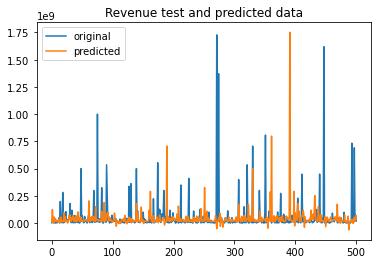

In [28]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Revenue test and predicted data")
plt.legend()
plt.show()


As already known, the model isn't performing good at all. All evaluation metrices are producing trashy results.
No point of performing further analysis.